# Reinforcement Learning 
## MLU Session 7 - Berlin 
### Lecture 1

Cyrus Vahid @ Deep Engine

email: cyrusmv@amazon.com

# Navigating in a grid
- If you click a button the red square will start moving. Click the same button many times, and it will move faster and faster.
- Everytime you are moving horizontally you get a wind throwing you upwards.
- Everytime you are moving vertically you get a wind throwing you to the left.
- Whenever the countdown reaches 0, you loose.
- Hitting the outside walls or red obstacles would cause you to loose
- You win when you reach the green cell and will be rewarded 1000 bonous points

In [35]:
from IPython.display import IFrame
IFrame("../src/gridworld-game-with-goal.html", height=620, width=555)

# RL Elements

- Agent: Learner or decision maker
- Environment: What the agent interacts with. The environment could be known, unknown, or complex.
- Policy: A set of actions from which an agent can choose. In our example: Left-Right-Up-Down
- Action: Decisions an agent makes based on a policy in response to the environment. 
- State: The information that is used to determine what happens next.
- Reward: A scalar feedback that after each action the environment returns. An agent's job is to maximize the cumulative reward.

![](../images/agent-env.png)

# Reward Hypothesis








- ***All*** That all of what we mean by goals and purposes can be well thought of as maximization of the expected value of the cumulative sum of a received scalar signal (reward).
for further information and discuttion check this [link](http://incompleteideas.net/rlai.cs.ualberta.ca/RLAI/rewardhypothesis.html).

- We will come back to this later as the reductionist argument could have unseen consequences



# Markov Property
- The future can be predicted independently from the past and only baed on present.
 - Example: Autonomous helicopter: 

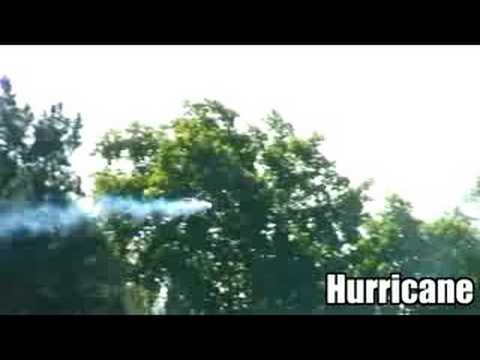

In [30]:
from IPython.display import YouTubeVideo
from datetime import timedelta
YouTubeVideo('VCdxqn0fcnE', width=560*1.5, height=316*1.5)

- Velocity, location, and direction of the helicopter at time t is what we need to determine where the helicopter will be in time t+1
- The environment affects the helicopter after each action based on wind speed.

# Markov Property
$ \boldsymbol{\large Definition:}$

$$
\large State\ S_t\ is\ Markov\ if\ and\ only\ if: 
$$
$$\large 
\boxed{𝑃(𝑆_{𝑡+1}|𝑆_𝑡)=𝑃(𝑆_{𝑡+1}|𝑆_1, …, 𝑆_𝑡)}\ \small without\ action
$$
$$or$$
$$\large
\boxed{𝑃(𝑆_{𝑡+1}|𝑆_𝑡, a_t)=𝑃(𝑆_{𝑡+1}|𝑆_1, …, 𝑆_𝑡, a_t)}\ \small with\ action
$$

$$
Or\ more\ intuitively:
$$
$$\large 
\boldsymbol{Future\ is\ independent\ of\ past\ given\ present.}
$$



# Markov Chain
- A stochastic model, describing a sequence of possible events where probability of each event only depends on the previous state.
- It is memoryless

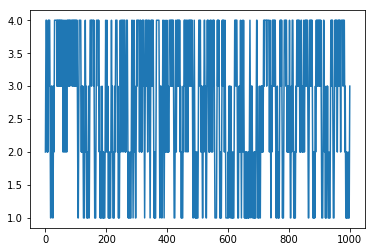

In [10]:
# Python code for 1-D random walk.
import random
import numpy as np
import matplotlib.pyplot as plt
 
# Probability to move up or down
prob = [0.5, 0.5]  
 
# statically defining the starting position
start = 2 
positions = [start]
 
# creating the random points
rr = np.random.random(1000)
downp = rr < prob[0]
upp = rr > prob[1]
  
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up)
# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.show()




In [3]:
print(positions)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 3, 4, 3, 2, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 4, 3, 4, 4, 3, 2, 3, 4, 3, 4, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 2, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 2, 3, 4, 4, 4, 3, 2, 1, 2, 1, 2, 3, 4, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 4, 3, 4, 3, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 2, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 4, 4, 4, 4, 3, 4, 4, 3, 2, 1, 2, 3, 4, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 4, 4, 3, 4, 4, 3, 2, 1, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 3, 4, 3, 4, 4, 4, 3, 2, 3, 2, 1, 1, 1, 2, 3, 2, 1, 1, 

In [6]:
import pandas as pd
df = pd.DataFrame(positions)
df

,0
0,2
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,2
